### Self-Reference

In [1]:
def print_sums(x):
    print(x)
    def next_sum(y):
        return print_sums(x+y)
    return next_sum

In [2]:
print_sums(1)(3)(5)

1
4
9


<function __main__.print_sums.<locals>.next_sum(y)>

### Recursive Functions
A function is called recursive if the body of that function calls itself, either directly or indirectly.
1. Base case. The simplest function input; the stopping condition for the recursion.
2. Recursive call on a smaller problem. We assume that a recursive call on this smaller problem will give the expected result("recursive leap of faith")
3. Solve the larger problem.

##### Example: Sum digits without using a while statement

In [4]:
def split(n):
    return n // 10 , n % 10
def sum_digits(n):
    if n < 10:
        return n
    else:
        all_but_last, last = split(n)
        return sum_digits(all_but_last) + last

In [5]:
sum_digits(163)

10

- The def statement header
- Conditional statements check for base cases, which are evaluated without recursive calls.
- Recursive cases are evaluated with recursive calls.

### Recursion in Environment Diagram
- The same function is called multiple times.
- We first recursively create frames until we hit the base case. Different frames keep track of the different arguments in each call.
- The call completes when the return value appear. From the base case we build our answer going back up.

### Verifying Recursive Functions
(Induction)
**The Recursive Leap of Faith**
1. Verify the base case
2. Treat `func` as a *functional abstraction*
3. Assume that `func(n-1)` is correct
4. Verify that `func(n)` is correct, assuming that `func(n-1)` is correct

### Mutual Recursion
When a recursive procedure is divided among two functions that call each other, the functions are said to be mutually recursive.

In [3]:
def even(n):
    if n == 0:
        return True
    else:
        return odd(n-1)
def odd(n):
    if n == 0:
        return False
    else:
        return even(n-1)

even(10000002)

RecursionError: maximum recursion depth exceeded

Python limits the recursion depth.

##### Example: The Luhn Algorithm
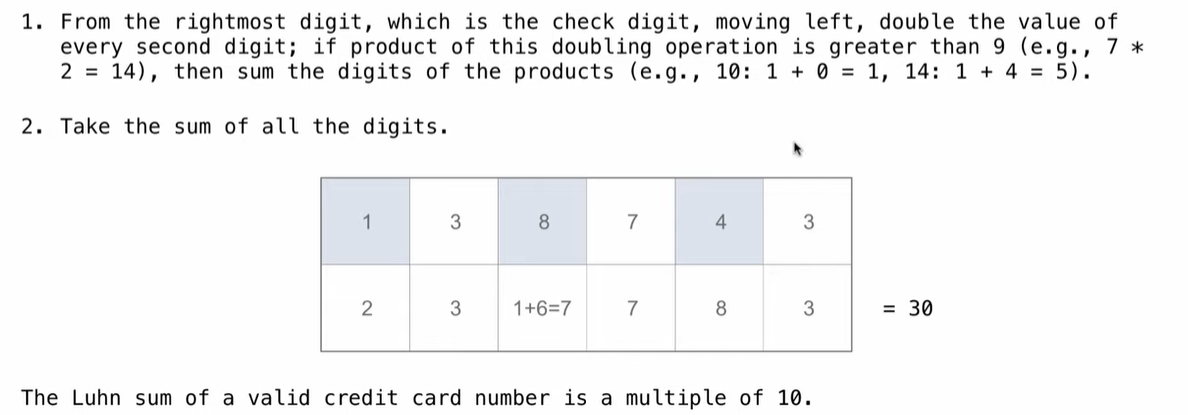

In [ ]:
def luhn_sum_double(n):
    all_but_last, last = split(n)
    luhn_digit = sum(last * 2)
    if n < 10:
        return luhn_digit
    else:
        return luhn_sum(all_but_last) + luhn_digit

def luhn_sum(n):
    if n < 10:
        return n
    else:
        all_but_last, last = split(n)
        return luhn_sum_double(all_but_last) + last

### Iteration v.s. Recursion
Iteration is a special case of recursion
e.g.
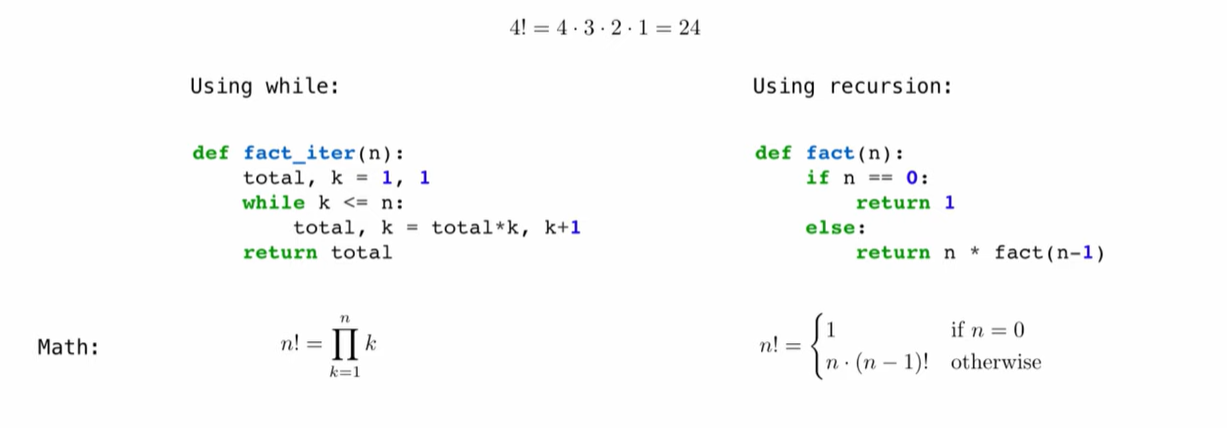
可以从数学表达式或者proof technique（direct proof, induction）理解

##### Converting Recursion to Iteration
- What state must be maintained by the iterative function
##### Converting Iteration to Recursion
- The state of an iteration can be passed as arguments(感觉是不同方法传递需要保持的state)

In [ ]:
def sum_digit_iter(n):
    digit_sum = 0
    while n > 0:
        n, last = split(n)
        digit_sum = digit_sum + last
        #updates via assignment
    return digit_sum

def sum_digit_rec(n, digit_sum):
    if n == 0:
        return digit_sum
    else:
        n, last = split(n)
        sum_digit_rec(n, digit_sum+last)
        #arguments to a recursive call

### Homework review
- Base case 要完善且坚实有依据，这是最后能够返回值的基础
- Recursive call on a smaller problem. 要有top-to-down意识，方可活用helper function
- 抽象思考什么是a smaller problem，可以联想集合的拆分和全概率公式
- 要仔细考虑n与n-1情况是如何联系在一起和传递的。